# Predict the Cost of Homes in California Using Numpy + Pandas in Jupyter (with Pipelines)

- 9 feature variables and 1 target variable:

**Feature Variables**

**longitude:** A measure of how far west a house is (a higher value is farther west)</br>
**latitude:** A measure of how far north a house is (a higher value is farther north)</br>
**housingMedianAge:** Median age of a house within a block (a lower number is a newer building)</br>
**totalRooms:** Total number of rooms within a block</br>
**totalBedrooms:** Total number of bedrooms within a block</br>
**population:** Total number of people residing within a block</br>
**households:** Total number of households, a group of people residing within a home unit, for a block</br>
**medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)</br>
**oceanProximity:** Location of the house in proximity to the ocean</br>

**Target Variable**
</br>
**medianHouseValue:** Median house value for households within a block (measured in US Dollars)

In [17]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [18]:
df = pd.read_csv("Home_price_list.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0.5, 0, 'Hosuse Price')

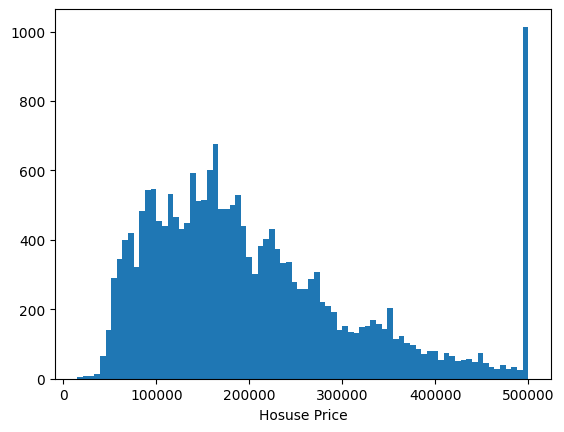

In [20]:
plt.hist(df.median_house_value, bins=80)
plt.xlabel('Hosuse Price')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

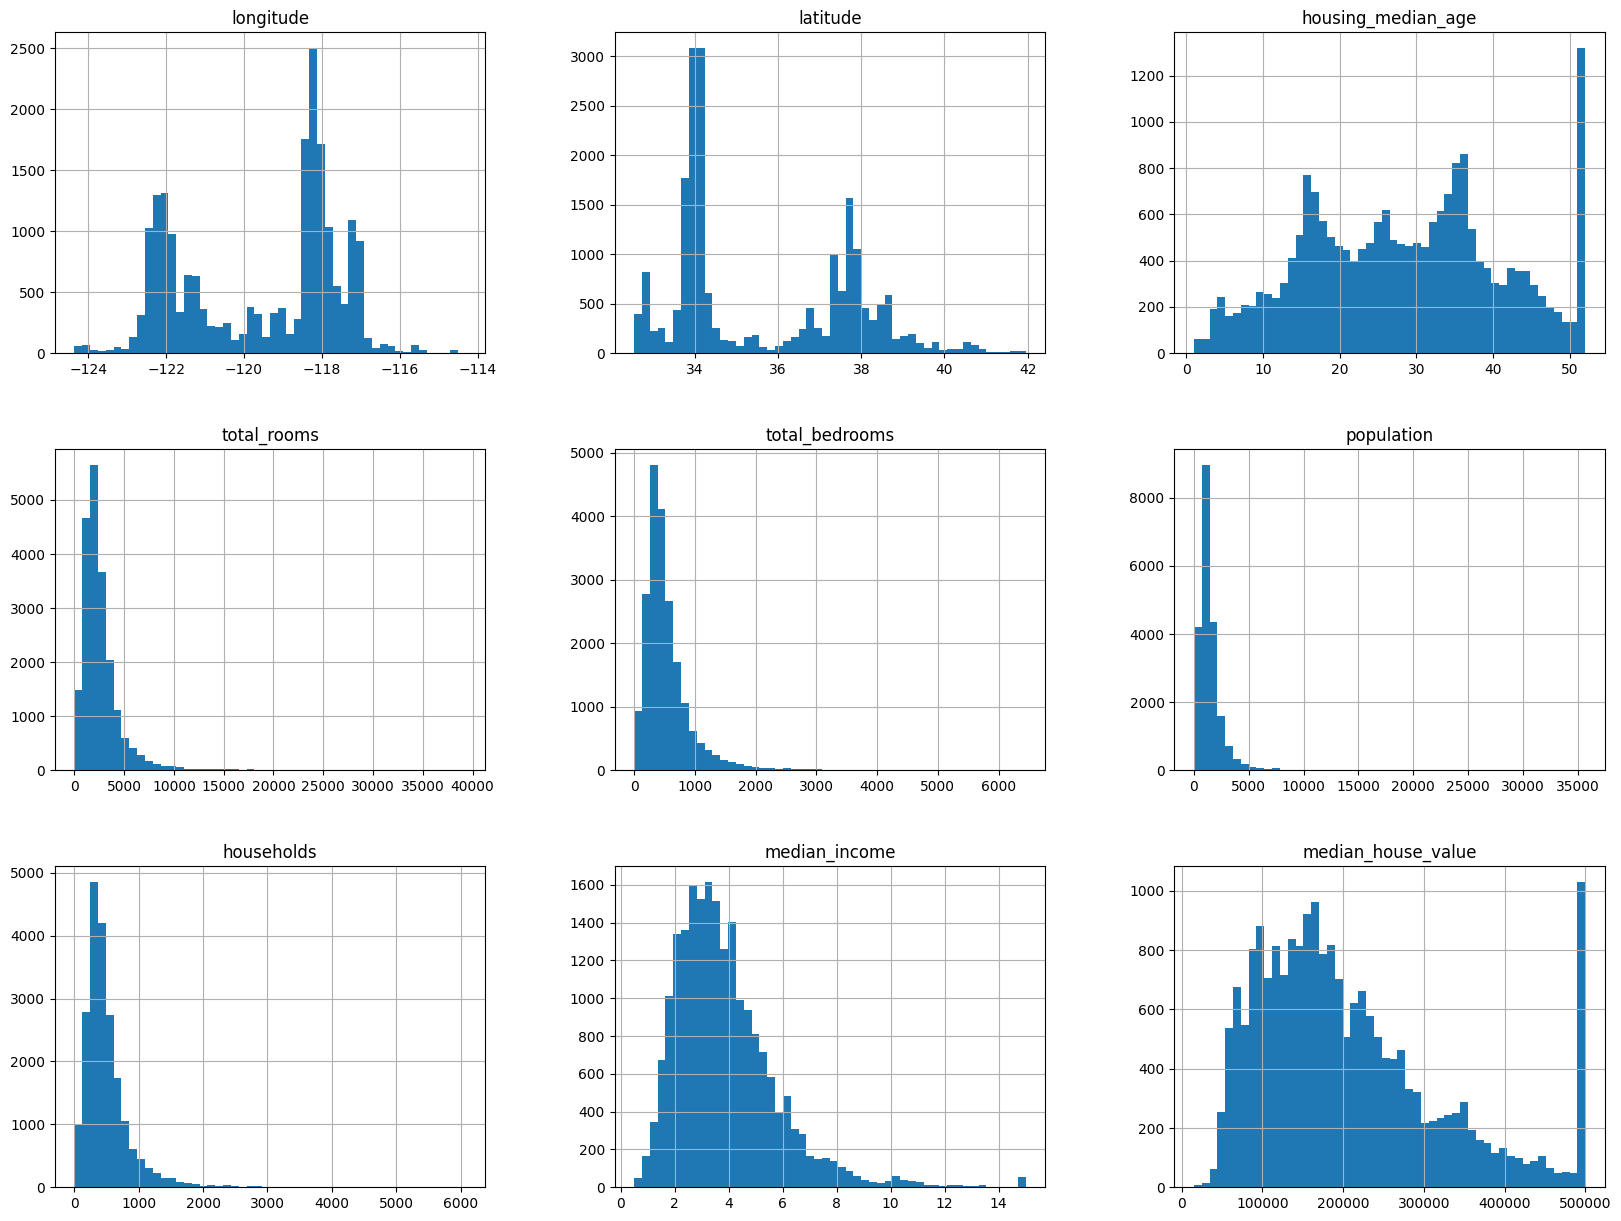

In [21]:
df.hist(bins=50, figsize=(20, 15))

In [22]:
x = df.drop('ocean_proximity', axis='columns')
x.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [23]:
corr = x.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

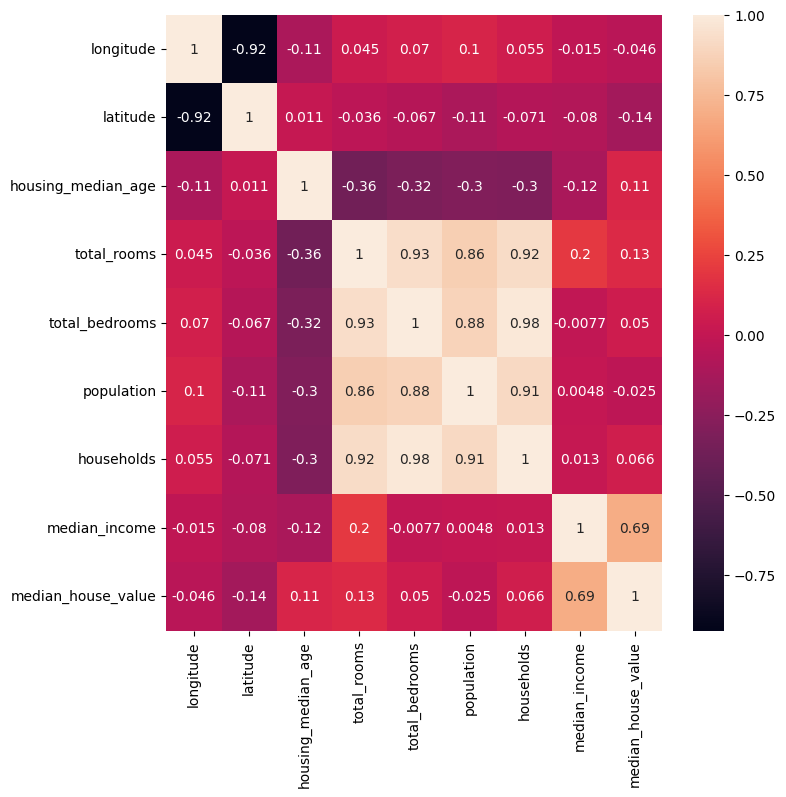

In [24]:
plt.figure(figsize=(8,8))

sns.heatmap(corr, annot=True)
plt.show()

In [25]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
df_temp = df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in df_temp.columns if df_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in df_temp.loc[:, df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
df_temp = df_temp[new_column_list]

# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(df_temp)

# convert the array values to a dataframe with the appropriate column names
df_temp = pd.DataFrame(array_Values, columns = new_column_list)

df_temp.isnull().sum()



total_bedrooms    0
dtype: int64

In [27]:
# loop through the list of columns and overlay each one
for column_name in new_column_list:
    df[column_name] = df_temp.replace(df[column_name],df[column_name])

# confirm columns no longer contain null data
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [28]:
# Additionally we noted that several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another, 
# so it's interesting to find out if a removal of a few of them would have any affect on the model performance

#  a new feature that is a ratio of the total rooms to households
df['rooms_per_household'] = df['total_rooms']/df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

# a new feature that is a ratio of the population to the households 
df['population_per_household']= df['population']/df['households']

# let's combine the latitude and longitude into 1
df['coords'] = df['longitude']/df['latitude']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [29]:
df.drop(['total_rooms', 'households', 'total_bedrooms', 'population', 'longitude', 'latitude'], axis=1, inplace=True)

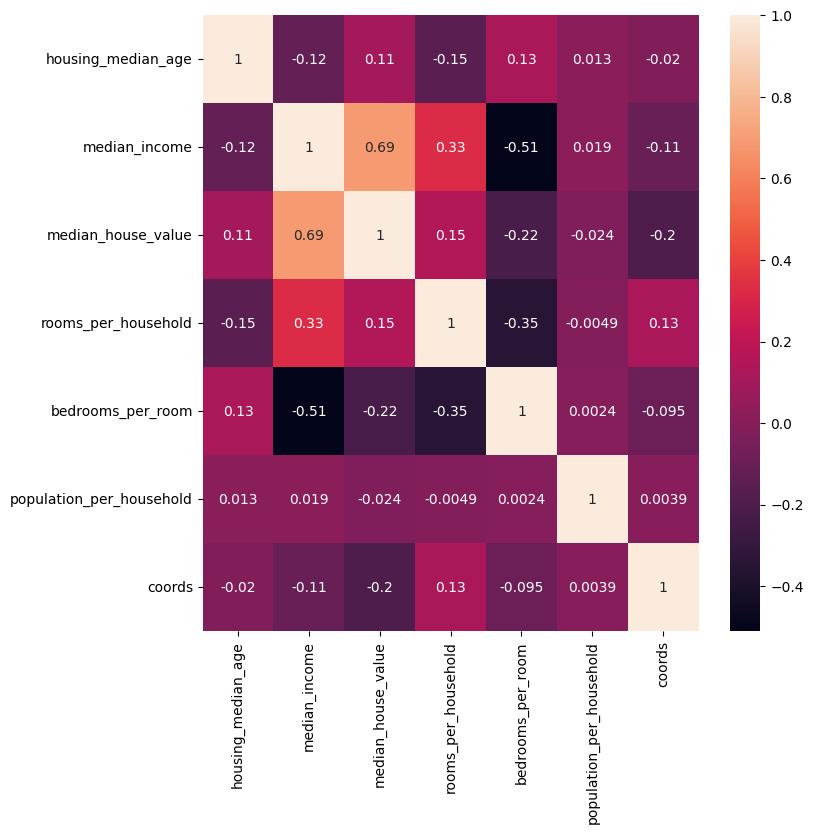

In [30]:
corr = df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

## Encode categorical data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [32]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## One-Hot Encoding

In [34]:

# Let's see how the Panda's get_dummies() function works
print(pd.get_dummies(df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [35]:
# let's replace the OCEAN_PROXIMITY column using get_dummies()
df_encoded = pd.get_dummies(data=df, columns=['ocean_proximity'])

# print the first few observations; notice the old OCEAN_PROXIMITY column is gone
df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


# Train the model

In [36]:
import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in df_encoded.columns]

# Split target variable and feature variables
X = df_encoded.drop('median_house_value',axis='columns')
y = df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  rooms_per_household  \
0                    41.0         8.3252             6.984127   
1                    21.0         8.3014             6.238137   
2                    52.0         7.2574             8.288136   
3                    52.0         5.6431             5.817352   
4                    52.0         3.8462             6.281853   
...                   ...            ...                  ...   
20635                25.0         1.5603             5.045455   
20636                18.0         2.5568             6.114035   
20637                17.0         1.7000             5.205543   
20638                18.0         1.8672             5.329513   
20639                16.0         2.3886             5.254717   

       bedrooms_per_room  population_per_household    coords  \
0               0.146591                  2.555556 -3.226769   
1               0.155797                  2.109842 -3.228209   
2               0.129516   

In [37]:
# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 11)
(4128, 11)
(16512,)
(4128,)


# Train the model in parallel using a Pipeline

In [38]:
	
# Pipelines

# Import pipeline code
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


pipeline_lr= Pipeline([('lr_classifier', LinearRegression())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestRegressor(n_estimators=10,random_state=10))]) 
pipeline_xgb = Pipeline([('xgb_classifier', XGBRegressor())]) 

pipelines = [pipeline_lr, pipeline_rf, pipeline_xgb]
pipe_dict = {0: 'Linear Regression', 1: 'Random Forest Regressor', 2: 'XGBRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i,model in enumerate(pipelines):
    pred_test = model.predict(X_test)
    if i == 1: rf_model = model
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(pd.DataFrame({'Actual': y_test, 'Predicted': pred_test}))

Linear Regression Test Accuracy:0.5151779395512528
         Actual      Predicted
20046   47700.0  104345.336280
3024    45800.0   90820.369998
15663  500001.0  215776.068599
20484  218600.0  283354.319517
9814   278000.0  245168.827947
...         ...            ...
15362  263300.0  225962.941236
16623  266800.0  188144.855757
18086  500001.0  434404.617285
2144    72300.0  110239.173719
3665   151500.0  209131.113357

[4128 rows x 2 columns]
Random Forest Regressor Test Accuracy:0.7570713221985844
         Actual  Predicted
20046   47700.0    47470.0
3024    45800.0    82890.0
15663  500001.0   419150.3
20484  218600.0   284150.0
9814   278000.0   219800.0
...         ...        ...
15362  263300.0   229910.0
16623  266800.0   225000.0
18086  500001.0   487820.8
2144    72300.0    73670.0
3665   151500.0   173150.0

[4128 rows x 2 columns]
XGBRegressor Test Accuracy:0.773063003108087
         Actual      Predicted
20046   47700.0   47042.636719
3024    45800.0   94094.601562
15663  5

## Determine Feature Importance

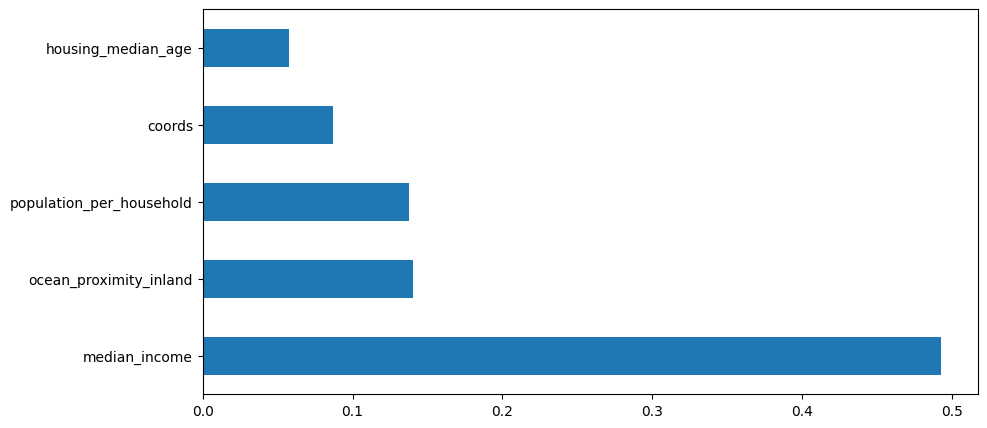

In [39]:
# Determine feature importance - random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data
# plot the 5 most important features 
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rf_model['rf_classifier'].feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');

In [40]:
from sklearn.metrics import mean_squared_error

# training data with 5 most important features
train_x_if = X_train[['housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]
test_x_if = X_test[['housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]

# create an object of the RandfomForestRegressor Model
rf_model_if = RandomForestRegressor(n_estimators=10,random_state=10)

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train)

# predict the target on the test data
predict_test_with_if = rf_model_if.predict(test_x_if)

In [41]:
# Root Mean Squared Error on the train and test data
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  58887.58386848384


## Cross Validation

In [43]:

# We can build and score a model on multiple folds using cross-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


# # define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline_xgb, X, y, scoring='r2', error_score='raise', cv=cv, n_jobs=-1, verbose=1)

# #average of all the r2 scores across runs
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7876668177793076


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished
